# 졸음운전사고에 대한 사망자수

### 1. 데이터 확인

In [92]:
import pandas as pd
from sklearn import preprocessing

In [93]:
#교통사고 데이터 로드
df_car = pd.read_csv("차종별졸음운전교통사고.csv", encoding='CP949', header=0)

In [94]:
# 데이터 확인
df_car = df_car[['구분', '승용차', '화물차']]
print(df_car)

# 원핫 인코딩
#label_encoder=preprocessing.LabelEncoder()
#df_car['구분']=label_encoder.fit_transform(df_car['구분'])
#print(df_car)

      구분   승용차  화물차
0  사고(건)  1769  464
1  사망(명)    80   34
2  부상(명)  3342  820
3  사고(건)  1985  497
4  사망(명)    54   37
5  부상(명)  3894  971
6  사고(건)  1751  450
7  사망(명)    49   33
8  부상(명)  3393  882


### 2. 데이터 전처리

In [95]:
# groupby 전처리
car_group = df_car.groupby('구분')
kind = []
smallcar = []
bigcar = []
for key, group in car_group :
    kind.append(key)
    smallcar.append(group['승용차'].sum())
    bigcar.append(group['화물차'].sum())
df_car = pd.DataFrame({'구분':kind, '승용차':smallcar, '화물차':bigcar})
display(df_car)

,구분,승용차,화물차
0,부상(명),10629,2673
1,사고(건),5505,1411
2,사망(명),183,104


### 3. 시각화

In [96]:
from matplotlib import pyplot as plt
import pandas as pd
from matplotlib import font_manager, rc
import seaborn as sns
font_path = "C:/KHR/PYDATAexam/data/malgun.ttf"   #폰트파일의 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

[256.3124432334242, 568.3060109289618]


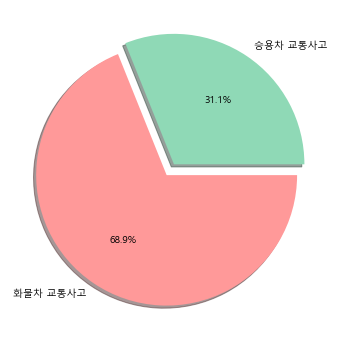

In [97]:
# 사건 건수 대비 사망자 수
ratio = [df_car.iloc[1,2]/df_car.iloc[1,1]*1000, df_car.iloc[2,2]/df_car.iloc[2,1]*1000]
print(ratio)
# 전체교통사고건수 : 졸음운전사고건수 - 파이 그래프
explode = [0.05, 0.05]
colors = ['#8fd9b6', '#ff9999']

plt.figure(figsize=(10,6))
plt.pie(ratio, labels=['승용차 교통사고', '화물차 교통사고'], autopct='%.1f%%',
        explode=explode, colors=colors, shadow=True)
#plt.savefig("사건건수대비사망자수.png")
plt.show()

,비율,차종
0,25.631244,승용차
1,56.830601,화물차


Text(0.5, 1.0, '승용차와 화물차 교통사고 건수 대비 사망자 비율')

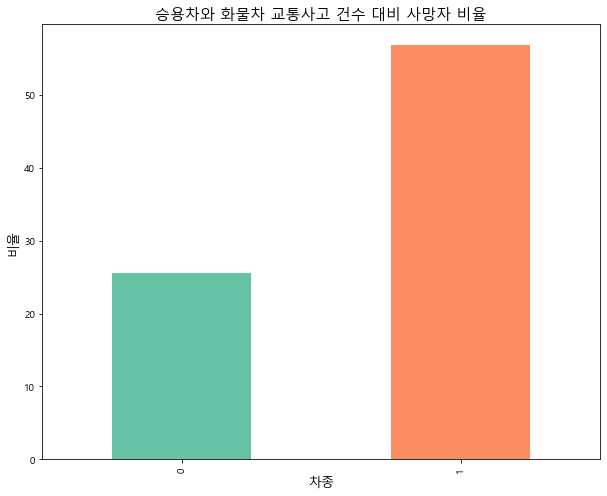

In [100]:
# 승용차 교통사고건수대비 사망자 비율, 화물차 교통사고건수대비 사망자 비율
df_new = {
    '비율': [df_car.iloc[1,2]/df_car.iloc[1,1]*100, df_car.iloc[2,2]/df_car.iloc[2,1]*100],
    '차종': ['승용차', '화물차'],
}
df_final = pd.DataFrame(df_new)
display(df_final)
mycolors = sns.color_palette('Set2',len(df_final['차종']))


plt.figure(figsize=(10,8))
df_final['비율'].plot(kind='bar', color=mycolors )
plt.xlabel('차종', size=13)
plt.ylabel('비율', size=13)
plt.title('승용차와 화물차 교통사고 건수 대비 사망자 비율', size=15)

#plt.savefig("시간대에_따른_고속도로_교통량.png") 